In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torch.nn import Softplus #smooth relu
import torch.nn as nn
import torch.nn.functional as F
from utils import generate_polynomial_data
import numpy as np
import torch
import torch.optim as optim
from torch.nn import MSELoss, BCELoss
from tqdm import tqdm
import pickle
from model import Net, check_loss_landscape

import matplotlib.pyplot as plt

/afs/csail.mit.edu/u/m/melango/.conda/envs/p3t14/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [3]:
torch.manual_seed(0)
suffix = "1"

n = 20
d = 10000
generate_data = False
usepickle = True

coeffs = -1+2*np.random.rand(d, 1)
xvals = -1+2*np.random.rand(n)
fileend = ".pickle" if usepickle else ".npy"

if generate_data:
    print("Generating Data...")
    X, Y = generate_polynomial_data(coeffs, xvals)
    #make categorical
    inds_pos = np.where(Y>0)
    inds_neg = np.where(Y<=0)
#     print(Y)
    Y[inds_pos] = 1
    Y[inds_neg] = 0
    with open("./datasets/X_categorical_%s%s" %(("pickle_" if usepickle else ""), sufix)+fileend, "wb") as f:
        if usepickle:
            pickle.dump(X, f)
        else:
            np.save(f, X)
    with open("./datasets/Y_categorical_%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "wb") as f:
        if usepickle:
            pickle.dump(Y, f)
        else:
            np.save(f, Y)
    with open("./datasets/coeffs_categorical_%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "wb") as f:
        if usepickle:
            pickle.dump(coeffs, f)
        else:
            np.save(f, coeffs)
    
else:
    with open("./datasets/X_categorical_%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "rb") as f:
        if usepickle:
            X = pickle.load(f)
        else:
            X = np.load(f)
    with open("./datasets/Y_categorical_%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "rb") as f:
        if usepickle:
            Y = pickle.load(f)
        else:
            Y = np.load(f)
    with open("./datasets/coeffs_categorical_%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "rb") as f:
        if usepickle:
            coeffs = pickle.load(f)
        else:
            coeffs = np.load(f)

In [4]:
#subsample to get 50/50 split
inds_pos = np.where(Y==1)[0]
inds_neg = np.where(Y==0)[0]
pos = np.random.choice(inds_pos, size=int(20/2))
neg = np.random.choice(inds_neg, size=int(20/2))
data_inds = np.concatenate([pos, neg])
data_inds.sort()
X, Y = X[data_inds], Y[data_inds]

Running on GPU


  0%|          | 0/50 [00:00<?, ?it/s]

Running on GPU
0.01


/afs/csail.mit.edu/u/m/melango/.conda/envs/p3t14/lib/python3.6/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 0\epochLoss =  0.643

  2%|▏         | 1/50 [02:31<2:03:50, 151.63s/it]

epoch: 0\epochLoss =  0.7440.008
epoch: 1\epochLoss =  0.712

  4%|▍         | 2/50 [05:02<2:01:10, 151.47s/it]

epoch: 1\epochLoss =  0.6960.0064
epoch: 2\epochLoss =  0.743

  6%|▌         | 3/50 [07:33<1:58:28, 151.25s/it]

epoch: 2\epochLoss =  0.7400.00512
epoch: 3\epochLoss =  0.009

  8%|▊         | 4/50 [10:12<1:57:38, 153.44s/it]

epoch: 3\epochLoss =  0.0090.004096000000000001
epoch: 4\epochLoss =  0.001

 10%|█         | 5/50 [13:24<2:03:51, 165.15s/it]

epoch: 4\epochLoss =  0.0000.0032768000000000007
epoch: 5\epochLoss =  0.003

 12%|█▏        | 6/50 [15:57<1:58:31, 161.62s/it]

epoch: 5\epochLoss =  0.0030.002621440000000001
epoch: 6\epochLoss =  0.003

 14%|█▍        | 7/50 [18:32<1:54:24, 159.64s/it]

epoch: 6\epochLoss =  0.0030.002097152000000001
epoch: 7\epochLoss =  0.000

 16%|█▌        | 8/50 [21:04<1:49:57, 157.08s/it]

epoch: 7\epochLoss =  0.0000.001677721600000001
epoch: 8\epochLoss =  0.000

 18%|█▊        | 9/50 [23:35<1:46:12, 155.44s/it]

epoch: 8\epochLoss =  0.0020.0013421772800000008
epoch: 9\epochLoss =  0.000

 20%|██        | 10/50 [26:09<1:43:17, 154.95s/it]

epoch: 9\epochLoss =  0.0020.0010737418240000006
epoch: 10\epochLoss =  0.002

 22%|██▏       | 11/50 [28:41<1:40:08, 154.07s/it]

epoch: 10\epochLoss =  0.0020.0008589934592000006
epoch: 11\epochLoss =  0.000

 24%|██▍       | 12/50 [31:12<1:36:58, 153.11s/it]

epoch: 11\epochLoss =  0.0020.0006871947673600005
epoch: 12\epochLoss =  0.000

 26%|██▌       | 13/50 [33:50<1:35:17, 154.53s/it]

epoch: 12\epochLoss =  0.0000.0005497558138880005
epoch: 13\epochLoss =  0.000

 28%|██▊       | 14/50 [36:22<1:32:14, 153.73s/it]

epoch: 13\epochLoss =  0.0000.0004398046511104004
epoch: 14\epochLoss =  0.000

 30%|███       | 15/50 [39:01<1:30:39, 155.42s/it]

epoch: 14\epochLoss =  0.0000.00035184372088832035
epoch: 15\epochLoss =  0.000

 32%|███▏      | 16/50 [41:32<1:27:22, 154.19s/it]

epoch: 15\epochLoss =  0.0000.0002814749767106563
epoch: 16\epochLoss =  0.002

 34%|███▍      | 17/50 [44:03<1:24:10, 153.04s/it]

epoch: 16\epochLoss =  0.0020.00022517998136852504
epoch: 17\epochLoss =  0.002

 36%|███▌      | 18/50 [46:36<1:21:44, 153.25s/it]

epoch: 17\epochLoss =  0.0020.00018014398509482005
epoch: 18\epochLoss =  0.000

 38%|███▊      | 19/50 [49:09<1:19:01, 152.95s/it]

epoch: 18\epochLoss =  0.0000.00014411518807585605
epoch: 19\epochLoss =  0.000

 40%|████      | 20/50 [51:43<1:16:39, 153.33s/it]

epoch: 19\epochLoss =  0.0000.00011529215046068484
epoch: 20\epochLoss =  0.000

 42%|████▏     | 21/50 [54:13<1:13:43, 152.55s/it]

epoch: 20\epochLoss =  0.0009.223372036854788e-05
epoch: 21\epochLoss =  0.000

 44%|████▍     | 22/50 [56:46<1:11:15, 152.68s/it]

epoch: 21\epochLoss =  0.0027.378697629483831e-05
epoch: 22\epochLoss =  0.002

 46%|████▌     | 23/50 [59:16<1:08:17, 151.77s/it]

epoch: 22\epochLoss =  0.0005.902958103587065e-05
epoch: 23\epochLoss =  0.002

 48%|████▊     | 24/50 [1:01:45<1:05:26, 151.02s/it]

epoch: 23\epochLoss =  0.0004.722366482869652e-05
epoch: 24\epochLoss =  0.002

 50%|█████     | 25/50 [1:04:15<1:02:42, 150.50s/it]

epoch: 24\epochLoss =  0.0003.777893186295722e-05
epoch: 25\epochLoss =  0.002

 52%|█████▏    | 26/50 [1:06:43<59:58, 149.95s/it]  

epoch: 25\epochLoss =  0.0003.0223145490365776e-05
epoch: 26\epochLoss =  0.002

 54%|█████▍    | 27/50 [1:09:13<57:25, 149.81s/it]

epoch: 26\epochLoss =  0.0022.4178516392292623e-05
epoch: 27\epochLoss =  0.002

 56%|█████▌    | 28/50 [1:11:42<54:54, 149.74s/it]

epoch: 27\epochLoss =  0.0001.93428131138341e-05
epoch: 28\epochLoss =  0.002

 58%|█████▊    | 29/50 [1:14:12<52:20, 149.56s/it]

epoch: 28\epochLoss =  0.0021.547425049106728e-05
epoch: 29\epochLoss =  0.002

 60%|██████    | 30/50 [1:16:40<49:46, 149.33s/it]

epoch: 29\epochLoss =  0.0021.2379400392853824e-05
epoch: 30\epochLoss =  0.002

 62%|██████▏   | 31/50 [1:19:10<47:19, 149.45s/it]

epoch: 30\epochLoss =  0.0009.90352031428306e-06
epoch: 31\epochLoss =  0.000

 64%|██████▍   | 32/50 [1:21:39<44:49, 149.42s/it]

epoch: 31\epochLoss =  0.0007.922816251426448e-06
epoch: 32\epochLoss =  0.002

 66%|██████▌   | 33/50 [1:24:08<42:16, 149.19s/it]

epoch: 32\epochLoss =  0.0006.338253001141159e-06
epoch: 33\epochLoss =  0.002

 68%|██████▊   | 34/50 [1:26:38<39:48, 149.28s/it]

epoch: 33\epochLoss =  0.0005.0706024009129275e-06
epoch: 34\epochLoss =  0.000

 70%|███████   | 35/50 [1:29:07<37:20, 149.38s/it]

epoch: 34\epochLoss =  0.0024.056481920730342e-06
epoch: 35\epochLoss =  0.000

 72%|███████▏  | 36/50 [1:31:37<34:51, 149.37s/it]

epoch: 35\epochLoss =  0.0023.245185536584274e-06
epoch: 36\epochLoss =  0.002

 74%|███████▍  | 37/50 [1:34:07<32:27, 149.84s/it]

epoch: 36\epochLoss =  0.0022.596148429267419e-06
epoch: 37\epochLoss =  0.000

 76%|███████▌  | 38/50 [1:36:36<29:54, 149.57s/it]

epoch: 37\epochLoss =  0.0002.0769187434139356e-06
epoch: 38\epochLoss =  0.002

 78%|███████▊  | 39/50 [1:39:06<27:25, 149.62s/it]

epoch: 38\epochLoss =  0.0021.6615349947311485e-06
epoch: 39\epochLoss =  0.000

 80%|████████  | 40/50 [1:41:35<24:55, 149.52s/it]

epoch: 39\epochLoss =  0.0001.3292279957849189e-06
epoch: 40\epochLoss =  0.002

 82%|████████▏ | 41/50 [1:44:05<22:25, 149.45s/it]

epoch: 40\epochLoss =  0.0001.0633823966279351e-06
epoch: 41\epochLoss =  0.002

 84%|████████▍ | 42/50 [1:46:34<19:54, 149.36s/it]

epoch: 41\epochLoss =  0.0008.507059173023481e-07
epoch: 42\epochLoss =  0.002

 86%|████████▌ | 43/50 [1:49:03<17:24, 149.23s/it]

epoch: 42\epochLoss =  0.0026.805647338418785e-07
epoch: 43\epochLoss =  0.000

 88%|████████▊ | 44/50 [1:51:35<15:00, 150.07s/it]

epoch: 43\epochLoss =  0.0005.444517870735028e-07
epoch: 44\epochLoss =  0.002

 90%|█████████ | 45/50 [1:54:06<12:32, 150.52s/it]

epoch: 44\epochLoss =  0.0004.355614296588023e-07
epoch: 45\epochLoss =  0.002

 92%|█████████▏| 46/50 [1:56:36<10:00, 150.16s/it]

epoch: 45\epochLoss =  0.0003.484491437270418e-07
epoch: 46\epochLoss =  0.002

 94%|█████████▍| 47/50 [1:59:05<07:29, 149.78s/it]

epoch: 46\epochLoss =  0.0002.7875931498163346e-07
epoch: 47\epochLoss =  0.000

 96%|█████████▌| 48/50 [2:01:35<04:59, 149.98s/it]

epoch: 47\epochLoss =  0.0022.230074519853068e-07
epoch: 48\epochLoss =  0.000

 98%|█████████▊| 49/50 [2:04:04<02:29, 149.81s/it]

epoch: 48\epochLoss =  0.0021.7840596158824544e-07
epoch: 49\epochLoss =  0.002

100%|██████████| 50/50 [2:06:34<00:00, 151.88s/it]


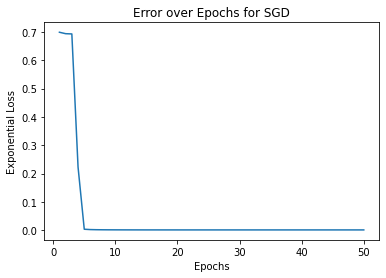

In [5]:
torch.manual_seed(0)

sgd = True
train = True

if sgd:
    model_path = "./models/model_sgd_categorical_%s.pt"%suffix
    net = Net(d, epochs = 50, loss = BCELoss(reduction="sum"), categorical = True)
else:
    model_path = "./models/model_categorical_%s.pt"%suffix
    net = Net(d, epochs = 20, loss = BCELoss(reduction="sum"), categorical = True)
    
if train:
    usegpu=True
    if torch.cuda.is_available() and usegpu:
        device = torch.device("cuda:0")
        print("Running on GPU")
    else:
        device = torch.device("cpu")
    net.to(device)
    if sgd:
        net.train_sgd(X, Y, 50000, lr = 1e-2, usegpu = usegpu)
    else:
        net.train_gd(X, Y, 2000, lr = 1e-3, usegpu = usegpu)
    torch.save(net.state_dict(), model_path)

/afs/csail.mit.edu/u/m/melango/.conda/envs/p3t14/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/afs/csail.mit.edu/u/m/melango/.conda/envs/p3t14/lib/python3.6/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Overall loss: tensor(1.3120e-06, grad_fn=<MseLossBackward>)
0.9982220530509949 1.0
0.9982220530509949 1.0
9.999723988585174e-05 0.0
9.951375432137866e-06 0.0
0.998418927192688 1.0
0.9984433054924011 1.0
2.3928085416075145e-21 0.0
1.2153918760304805e-07 0.0
1.9574069032302077e-09 0.0
1.9574069032302077e-09 0.0
2.0836141700897315e-08 0.0
0.9984003901481628 1.0
0.9984003901481628 1.0
6.690513350586166e-14 0.0
0.9984250068664551 1.0
0.9984250068664551 1.0
0.9984413981437683 1.0
3.3178118416550884e-17 0.0
0.9984264373779297 1.0
4.772729763951299e-25 0.0
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0]


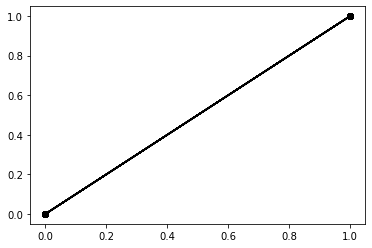

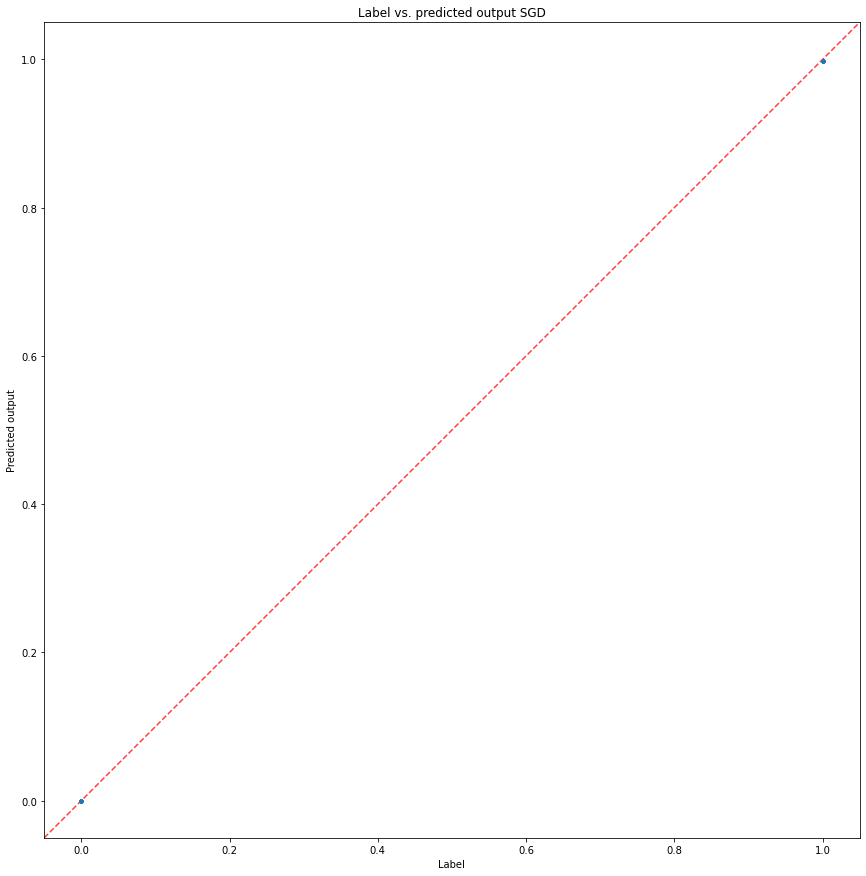

In [8]:
check_loss_landscape(model_path, X, Y, sgd=True, categorical=True)